## Big Sky 
### Alexandra Higley

Plot to get a compsoit sky plot of all the pulsars and take not of where the weird ones are in relation to the rest 

In [1]:
import numpy as np
from pylab import *
from math import e
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
from astropy import units as u
from astropy.coordinates import SkyCoord
#from scipy.optimize import curve_fit
#from astropy.io import fits
import glob
#import os

I first want to have a skyplot of all the pulsars with the outliers marked. I have a hunch that they are spacially correlated or at least reside in the same part of the sky. I want to demonstrate this with a plot. 

In [2]:
#using glob.glob to all all par-like files 
par_list = glob.glob('/Users/alexh/Desktop/Coding/Pulsars/regular/J*.par')
par_list = np.sort(par_list,kind='standardsort')

In [3]:
# credit this function to Mokhtar Ebrahim, April 21, 2020
# https://likege3eks.com/numpy-loadtxt-tutorial/
def generate_specific_rows(filePath, row_indices=[]):
    with open(filePath) as f:
        # using enumerate to track line no.
        for i, line in enumerate(f):
            #if line no. is in the row index list, then return that line
            if i in row_indices:
                yield line

In [4]:
namt=loadtxt(par_list[0], skiprows=0,unpack=True,usecols=(0),dtype='str')
#loading first (01) par file in its entirety 

#Finding where (which row) each parameter is 
elongt = np.where(namt=="ELONG")
elatt = np.where(namt=="ELAT")


def getlong(num):
    gen1 = generate_specific_rows(par_list[num],row_indices = [elongt[0]])
    #gen1 = generate_specific_rows(par_list[num],row_indices = [1,2,3,4])
    long=loadtxt(gen1, skiprows=0,unpack=True,usecols=(1))
    
    return long

def getlat(num):
    gen2 = generate_specific_rows(par_list[num],row_indices = [elatt[0]])
    #gen1 = generate_specific_rows(par_list[num],row_indices = [1,2,3,4])
    lat=loadtxt(gen2, skiprows=0,unpack=True,usecols=(1))
    
    return lat

long = np.empty(len(par_list))
lat = np.empty(len(par_list))

for i in range(0,len(par_list)):
    long[i] = getlong(i)
    lat[i] = getlat(i)


In [5]:
place = SkyCoord(long[0:]*u.deg, lat[0:]*u.deg, frame='barycentrictrueecliptic') #latitude & longitude

from astropy.coordinates import ICRS
cop = place.transform_to('icrs') #RA and DEC 

#radians
ra_rad = cop.ra.wrap_at(180 * u.deg).radian
dec_rad = cop.dec.radian

#degrees
ra_deg = cop.ra.degree
dec_deg = cop.dec.degree


In [6]:
J0340long = 62.6145455460622062521247599 #first crazy one
J0340lat = 21.3325446194676085088365314

J2322long = 0.1359501682244077557702938
J2322lat = 22.8783640195146988245700204

J0605long = 91.0368743153533285586420654
J0605lat = 14.52528236962645615676370534

J0406long = 65.5142962108352639588604305
J0406lat = 9.6019334622735538911988962

J0613long = 93.7990089614519545538340317
J0613lat = -25.4071429208287702661284158


J1n = SkyCoord(J0340long*u.deg, J0340lat*u.deg, frame='barycentrictrueecliptic')
J2n = SkyCoord(J2322long*u.deg, J2322lat*u.deg, frame='barycentrictrueecliptic')
J3n = SkyCoord(J0605long*u.deg, J0605lat*u.deg, frame='barycentrictrueecliptic')
J4n = SkyCoord(J0406long*u.deg, J0406lat*u.deg, frame='barycentrictrueecliptic')
J5n = SkyCoord(J0613long*u.deg, J0613lat*u.deg, frame='barycentrictrueecliptic')

from astropy.coordinates import ICRS
Jtimout1 = J1n.transform_to('icrs') #RA and DEC 
Jtimout2 = J2n.transform_to('icrs')
Jtimout3 = J3n.transform_to('icrs')
Jtimout4 = J4n.transform_to('icrs')
Jtimout5 = J5n.transform_to('icrs')

#radians
Jra_radw1 = Jtimout1.ra.wrap_at(180 * u.deg).radian
Jdec_radw1 = Jtimout1.dec.radian

jboir_deg = Jtimout1.ra.degree
jboid_deg = Jtimout1.dec.degree

Jra_radw2 = Jtimout2.ra.wrap_at(180 * u.deg).radian
Jdec_radw2 = Jtimout2.dec.radian

Jra_radw3 = Jtimout3.ra.wrap_at(180 * u.deg).radian
Jdec_radw3 = Jtimout3.dec.radian

Jra_radw4 = Jtimout4.ra.wrap_at(180 * u.deg).radian
Jdec_radw4 = Jtimout4.dec.radian

Jra_radw5 = Jtimout5.ra.wrap_at(180 * u.deg).radian
Jdec_radw5 = Jtimout5.dec.radian


In [7]:
colors2 = cm.plasma(np.linspace(0, 1, 8)) #color map

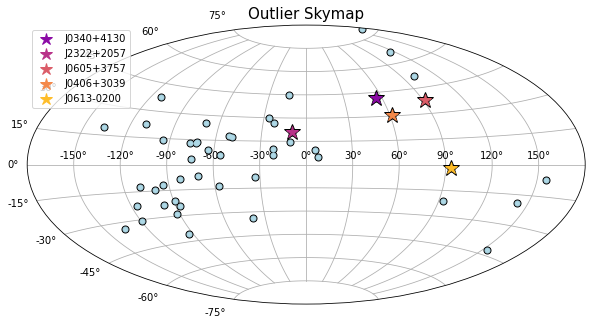

In [8]:
plt.figure(figsize=(10,6))
#plt.patch.set_facecolor('#DCE3F2')

plt.subplot(111, projection="aitoff")
plt.title("Outlier Skymap",fontsize=15)
plt.plot(ra_rad, dec_rad, 'o', markersize=7, color='black')
plt.plot(ra_rad, dec_rad, 'o', markersize=5, color = "lightblue")

plt.plot(Jra_radw1, Jdec_radw1, '*', markersize=17, color="black")
plt.plot(Jra_radw2, Jdec_radw2, '*', markersize=17, color="black")
plt.plot(Jra_radw3, Jdec_radw3, '*', markersize=17, color="black")
plt.plot(Jra_radw4, Jdec_radw4, '*', markersize=17, color="black")
plt.plot(Jra_radw5, Jdec_radw5, '*', markersize=17, color="black")

plt.plot(Jra_radw1, Jdec_radw1, '*', markersize=12, label = "J0340+4130", color=colors2[2])
plt.plot(Jra_radw2, Jdec_radw2, '*', markersize=12, label = "J2322+2057", color=colors2[3])
plt.plot(Jra_radw3, Jdec_radw3, '*', markersize=12, label = "J0605+3757", color=colors2[4])
plt.plot(Jra_radw4, Jdec_radw4, '*', markersize=12, label = "J0406+3039", color=colors2[5])
plt.plot(Jra_radw5, Jdec_radw5, '*', markersize=12, label = "J0613-0200", color=colors2[6])



#ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])

plt.grid(True)
plt.legend()
plt.subplots_adjust(top=0.95,bottom=0.0)
plt.show()